# Problem 2

Drugs are generally administered/prescribed by the physicians for a certain
period of time or they are administered at regular intervals, but for various reasons patients
might stop taking the treatment . Consider following example for better understanding

Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days,
but you stop taking the treatment after 3 days because of some adverse events.

In the above example ideal treatment duration is 10 days but patients stopped taking
treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff.
We want to study dropoff for “Target Drug”, the aim is to generate insights on what events
lead to patients stopping on “Target Drug”.


Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing
how drop-off rate is, dropoff rate is defined as number of patients dropping off each month.
Then come up with analysis to generate insights on what events are driving a patient to stop
taking “Target Drug”.

# **Importing Libraries**

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_parquet("/content/drive/MyDrive/dataset/Akaike/train.parquet")
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [105]:
df.shape

(3220868, 3)

## 1.1 > **Data cleaning**

### 1.1.1 **Data type**

In [106]:
# Checking data types
df.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

```
Datas are in correct data type
```

### 1.1.2 **Data structure**

In [107]:
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


```
Data is in structured format
```

### 1.1.3 **Duplicate data**

In [108]:
df.duplicated().sum()

35571

```
Totally 35571 duplicates values are there duplicate values are unwanted data. So duplicate values can be remove
```

In [109]:
df = df.drop_duplicates()


In [110]:
df.duplicated().sum()

0

```
Duplicate values are removed from the data
```

### 1.1.4 **Missing values**

In [111]:
df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

```
There is no missing values in the data

```

# **Restructuring dataset**

In [112]:
df['Date'] =pd.to_datetime(df['Date'])

In [113]:
df_sort = df.sort_values(by=['Patient-Uid', 'Date']).reset_index()
df_sort

,index,Patient-Uid,Date,Incident
0,1750087,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7
1,1473893,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2
2,1387922,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7
3,223191,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0
4,557302,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9
...,...,...,...,...
3185292,26581536,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6
3185293,27737944,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG
3185294,20027927,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1
3185295,14145873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG


In [114]:
df_sort.drop(['index'],axis=1,inplace =True)

In [115]:
positive = df_sort[df_sort['Incident']=='TARGET DRUG']
positive

,Patient-Uid,Date,Incident
1763810,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG
1763812,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG
1763814,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG
1763950,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG
1763954,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG
...,...,...,...
3185089,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG
3185211,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG
3185291,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG
3185293,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG


In [116]:
pos_head = positive.groupby('Patient-Uid').head(1)
pos_head

,Patient-Uid,Date,Incident
1763810,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG
1763950,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG
1764139,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2019-10-31,TARGET DRUG
1764238,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2018-04-05,TARGET DRUG
1764429,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2019-09-10,TARGET DRUG
...,...,...,...
3184878,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-06-16,TARGET DRUG
3184971,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-07-18,TARGET DRUG
3185085,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-05-21,TARGET DRUG
3185211,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG


In [117]:
positive['temp_date'] = positive['Date']

common_ids = positive['Patient-Uid'].isin(pos_head['Patient-Uid'])

positive.loc[common_ids, 'temp_date'] = positive['Patient-Uid'].map(pos_head.set_index('Patient-Uid')['Date'])

<ipython-input-117-1d64b0c0b026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['temp_date'] = positive['Date']
<ipython-input-117-1d64b0c0b026>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive.loc[common_ids, 'temp_date'] = positive['Patient-Uid'].map(pos_head.set_index('Patient-Uid')['Date'])
<ipython-input-117-1d64b0c0b026>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the o

In [118]:
positive['temp_date'] =pd.to_datetime(positive['temp_date'])

<ipython-input-118-3380415e2370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['temp_date'] =pd.to_datetime(positive['temp_date'])


In [119]:
positive['no_of_month'] = (positive['Date'].dt.year - positive['temp_date'].dt.year) * 12 + (positive['Date'].dt.month - positive['temp_date'].dt.month)


<ipython-input-119-2479349e6372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['no_of_month'] = (positive['Date'].dt.year - positive['temp_date'].dt.year) * 12 + (positive['Date'].dt.month - positive['temp_date'].dt.month)


In [121]:
a = positive[positive['no_of_month'] >= 12]['Patient-Uid'].unique()
len(a)

3699

In [122]:
len(positive['Patient-Uid'].unique())

9374

In [123]:
uni = positive['Patient-Uid'].unique()
temp_df = pd.DataFrame(uni,columns=['Patient-Uid'])
temp_df

,Patient-Uid
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f
...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f


In [124]:
# creating temp table for getting no of patient drop off within one year
temp_df['Target'] = temp_df['Patient-Uid'].apply(lambda x : 1 if x in a else 0)

In [125]:
temp_df

,Patient-Uid,Target
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,1
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,0
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,1
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,0
...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,0
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,0
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,0
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,0


# EDA

## 1 > **Drop Off rate for 1 Year**

In [126]:
temp_df['Target'].value_counts()

0    5675
1    3699
Name: Target, dtype: int64

In [127]:
l=[len(temp_df[temp_df['Target']==1]),len(temp_df[temp_df['Target']==0])]

In [128]:
l

[3699, 5675]

Text(0, 0.5, 'Patient')

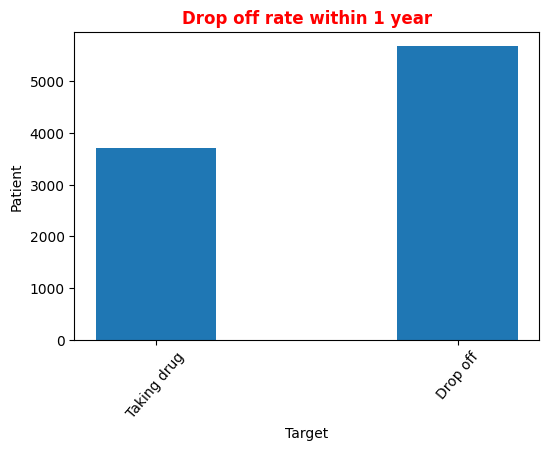

In [129]:
plt.figure(figsize=(6,4))
plt.bar(['Taking drug','Drop off'], l,width = 0.4)
plt.xticks(rotation=50)
plt.title('Drop off rate within 1 year', fontweight='bold', color='Red')
plt.xlabel('Target')
plt.ylabel('Patient')

## 2 > **Each Month how many patient dropping off**

In [130]:
positive_df = positive.groupby('Patient-Uid').tail(1)
positive_df

,Patient-Uid,Date,Incident,temp_date,no_of_month
1763814,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2020-07-08,2
1764050,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2019-10-29,TARGET DRUG,2018-04-24,18
1764157,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2020-05-26,TARGET DRUG,2019-10-31,7
1764287,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2019-11-22,TARGET DRUG,2018-04-05,19
1764462,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-07-14,TARGET DRUG,2019-09-10,10
...,...,...,...,...,...
3184884,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-05,TARGET DRUG,2020-06-16,2
3184971,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-07-18,TARGET DRUG,2020-07-18,0
3185089,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,2020-05-21,3
3185211,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,2020-07-21,0


In [131]:
temp_df2 = positive_df[(positive_df['no_of_month'] >= 0 ) & (positive_df['no_of_month'] <= 12)]
temp_df2

,Patient-Uid,Date,Incident,temp_date,no_of_month
1763814,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2020-07-08,2
1764157,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2020-05-26,TARGET DRUG,2019-10-31,7
1764462,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-07-14,TARGET DRUG,2019-09-10,10
1764608,a0e9c472-1c7c-11ec-9f47-16262ee38c7f,2020-07-24,TARGET DRUG,2019-07-24,12
1764692,a0e9c4a3-1c7c-11ec-aa86-16262ee38c7f,2020-05-01,TARGET DRUG,2020-02-07,3
...,...,...,...,...,...
3184884,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-05,TARGET DRUG,2020-06-16,2
3184971,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-07-18,TARGET DRUG,2020-07-18,0
3185089,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,2020-05-21,3
3185211,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,2020-07-21,0


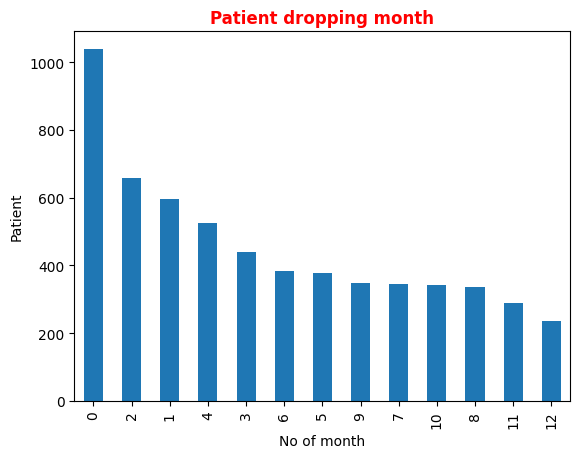

In [133]:
group = temp_df2.groupby('no_of_month')['Patient-Uid'].count().sort_values(ascending =False)
group.plot(kind ='bar')
plt.title('Patient dropping month', fontweight='bold', color='Red')
plt.xlabel('No of month')
plt.ylabel('Patient')
plt.show()

```
By first dose, second month, first month majority of people stop taking drug

more than 38% people dropping off drug in this three month
```

# **Conclusion**



1.   Based on the insights more than 60 % of people dropping off the medication within 1 year.
2.   Majority of people drop off by first dose itself more than 17% of people
     stop taking drug.




